<h1 align="center"> Homework 10: Predicting Used Corolla Price</h1>
<h3 align="center"> IST 5520: Data Methodologies in Python, 2018 Spring </h3>
<h3 align="center"> Student: XXX </h3>

In [1]:
# Import modules
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt

# Configure inline mode
%matplotlib inline

c:\users\chenla\envs\ist5520\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1. Data

The data file “ToyotaCorolla.csv” contains data on used Toyota Corolla on sale during late summer of 2004 in the Netherland. The dataset includes 1436 records containing 39 attributes such as Price, Age, Manufacture Year, and Kilometers on Odometer. The goal is to predict the price of a used Toyota Corolla based on its specifications.

In this exercise, we only focus on the following variables:
- Price – offer price in EUROs 
- Age – age months as in August 2004
- KM – accumulated kilometers on odometer
- FuelType – fuel type (petrol, diesel, CNG - compressed natural gas)
- HP – horse power
- MetColor – metallic color? (Yes =1, No = 0)
- Automatic – automatic (Yes = 1, No = 0)
- CC – cylinder volume in cubic centimeters
- Doors – number of doors
- Weight – weight in kilograms

In [2]:
dat = pd.read_csv("../Data/ToyotaCorolla.csv")
# dat.Education = dat.Education.astype('str')
dat.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [3]:
# Summary statistics
dat.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 106.6+ KB


**Question 1**: Are there missing values in the dataset?

As show above, each column contains 1436 data points. There is no missing value.

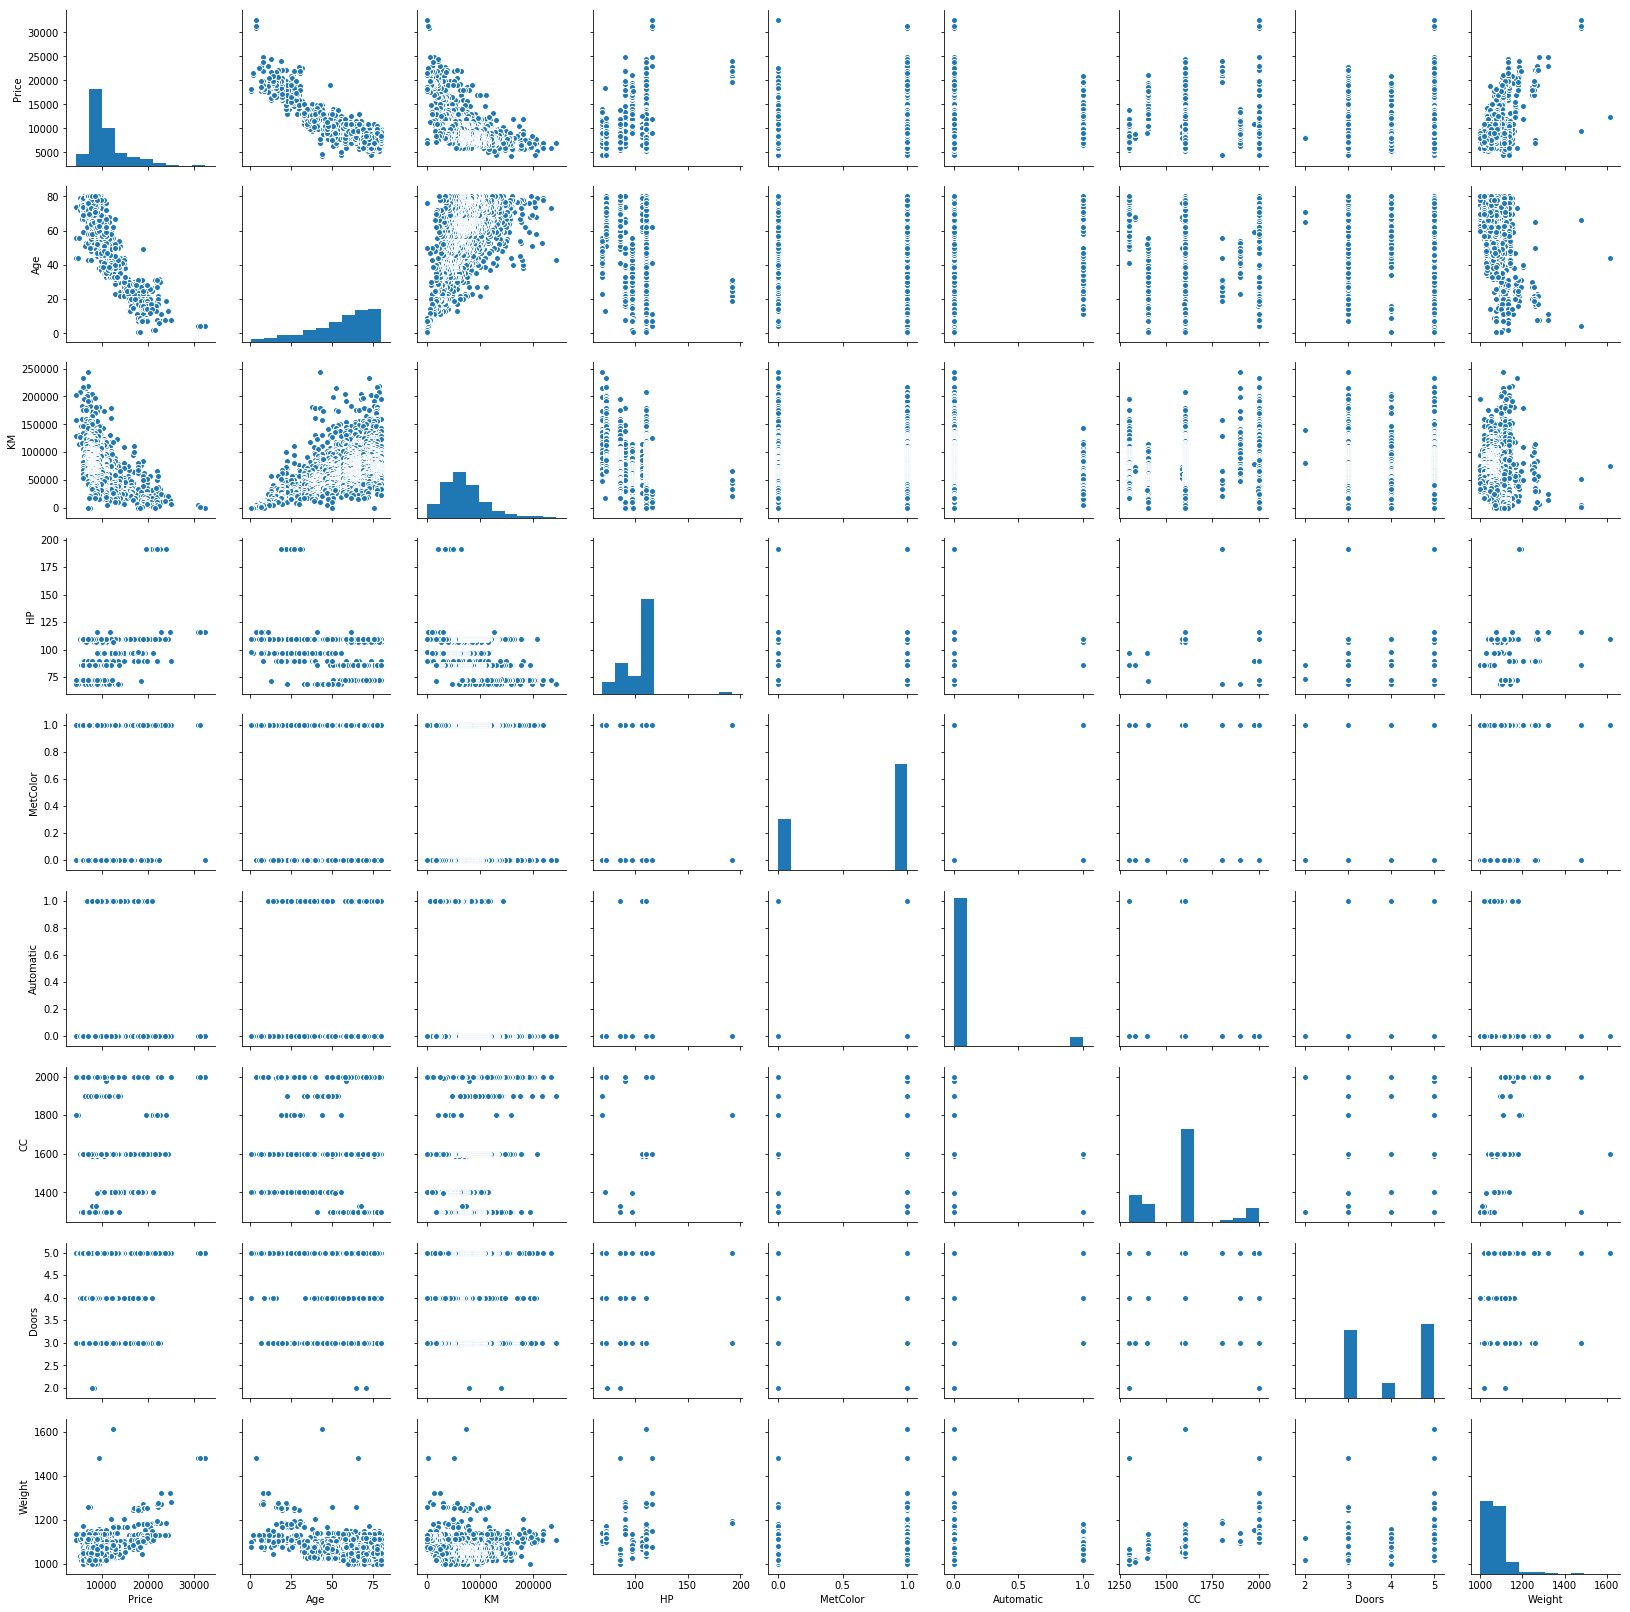

In [5]:
# Scatterplot matrix
import seaborn as sns
sns.pairplot(dat)

**Question 2**: What is the linear association between Age and Price? 

As shown in the scatterplot matrix, Age and Price are negatively associated.

**Question 3**: What is the linear association between Cc and Price? 

As shown in the scatterplot matrix, the linear association between Cc and Price is not clear.

## 2. Create Design Matrices

To fit most of the models covered by statsmodels, you will need to create two design matrices. The first is a matrix of endogenous variable(s) (i.e. dependent, response, regressand, etc.). The second is a matrix of exogenous variable(s) (i.e. independent, predictor, regressor, etc.). 

The patsy module provides a convenient function to prepare design matrices using R-like formulas. You can find more information here: http://patsy.readthedocs.org

We use patsy's dmatrices function to create design matrices:

In [6]:
# Create design matrices, X should contain intercept term
y, X = dmatrices('Price ~ Age + KM + FuelType + HP + MetColor + ' + 
                 'Automatic + CC + Doors + Weight',
                 data=dat,
                 return_type='dataframe')

In [7]:
# Show the head of y
y.head()

,Price
0,13500.0
1,13750.0
2,13950.0
3,14950.0
4,13750.0


In [8]:
# Show the head of X
X.head()

,Intercept,FuelType[T.Diesel],FuelType[T.Petrol],Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,1.0,1.0,0.0,23.0,46986.0,90.0,1.0,0.0,2000.0,3.0,1165.0
1,1.0,1.0,0.0,23.0,72937.0,90.0,1.0,0.0,2000.0,3.0,1165.0
2,1.0,1.0,0.0,24.0,41711.0,90.0,1.0,0.0,2000.0,3.0,1165.0
3,1.0,1.0,0.0,26.0,48000.0,90.0,0.0,0.0,2000.0,3.0,1165.0
4,1.0,1.0,0.0,30.0,38500.0,90.0,0.0,0.0,2000.0,3.0,1170.0


## 3. OLS (Linear Probability Model)

In [9]:
# Describe the linear model
ols_mod = sm.OLS(y,X)

# Fit model
ols_fit = ols_mod.fit()

# Summarize model
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     948.0
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:33:51   Log-Likelihood:                -12346.
No. Observations:                1436   AIC:                         2.471e+04
Df Residuals:                    1425   BIC:                         2.477e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3801.3614   1304.082     -2.915      0.004   -6359.487   -1243.236
FuelType[T.Diesel]  3390.0766    518.795      6.535      0.000    2372.392    4407.761
FuelType[T.Petrol]  1120.6764    332.365      3.372      0.001     468.699    1772.654
Age                 -122.0145      2.602    -46.889      0.000    -127.119    -116.910
KM                    -0.0162      0.001    -12.347      0.000      -0.019      -0.014
HP                    60.8133      5.756     10.565      0.000      49.522      72.104
MetColor              57.1598     74.939      0.763      0.446     -89.843     204.162
Automatic            330.2509    157.096      2.102      0.036      22.087     638.414
CC                    -4.1744      0.545     -7.656      0.000      -5.244      -3.105
Doors                 -7.7763     40.064     -0.194      0.846     -86.368      70.815
Weight                20.0094      1.203     16.629      0.000      17.649      22.370
==============================================================================
Omnibus:                      275.198   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2826.189
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       9.776   Cond. No.                     2.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question 4**: What is the effect of Age on Price? Is it statistically significant?

From the OLS result, we can see that Age has a negative effect on Price. Increasing the age of the used car by 1 month would on average reduce the price by 122 enros, keeping all other factors constant. The effect is statistically significant, as the p-value of the t-statistic is very low (p-value < 0.001).

**Question 5**: What is the coefficient estimate for dummy variable FuelTypeDiesel? What does it mean?

The dummy variable FuelTypeDiesel has a positive and significant effect on price. Compared with a used car that consumes compressed natural gas (CNG), a used car with a diesel engine has a 3390 higher price in enros, keeping all other factors constant.

**Question 6**: List all independent variables that does not have statistically significant effect on Price?

The following two variables do not have statistically significant effects on Price:

- MetColor (p-value = 0.446)
- Doors (p-value = 0.846)

## 4. OLS Excluding Insignificant Variables

In [10]:
# Describe the linear model
ols_mod2 = sm.OLS(y,X.drop(['MetColor','Doors'],axis=1))

# Fit model
ols_fit2 = ols_mod2.fit()

# Summarize model
ols_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:33:52   Log-Likelihood:                -12346.
No. Observations:                1436   AIC:                         2.471e+04
Df Residuals:                    1427   BIC:                         2.476e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3718.3643   1261.405     -2.948      0.003   -6192.771   -1243.957
FuelType[T.Diesel]  3387.6754    509.044      6.655      0.000    2389.121    4386.229
FuelType[T.Petrol]  1112.1618    331.691      3.353      0.001     461.508    1762.816
Age                 -122.1299      2.596    -47.041      0.000    -127.223    -117.037
KM                    -0.0163      0.001    -12.416      0.000      -0.019      -0.014
HP                    60.8932      5.639     10.799      0.000      49.832      71.954
Automatic            330.4641    156.179      2.116      0.035      24.098     636.830
CC                    -4.1682      0.537     -7.763      0.000      -5.221      -3.115
Weight                19.9383      1.126     17.709      0.000      17.730      22.147
==============================================================================
Omnibus:                      273.470   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2777.912
Skew:                          -0.572   Prob(JB):                         0.00
Kurtosis:                       9.717   Cond. No.                     2.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Compare the two models
pd.DataFrame({'Number of IVs':[len(ols_fit.params)-1,len(ols_fit2.params)-1],
             'Adjusted R2':[ols_fit.rsquared_adj, ols_fit2.rsquared_adj]},
             index = ['Model 1 with all IVs','Model 2 excluding insignificant IVs'])

,Adjusted R2,Number of IVs
Model 1 with all IVs,0.868406,10
Model 2 excluding insignificant IVs,0.868535,8


**Question 7**: Evaluate the simplicity (i.e., number of IVs) and usefulness (i.e., adjusted R2) of the two models. Which model is best to predict/explain the price of used Toyota Corolla? Explain your reasons.

Model 2 is best to predict/explain the price of used Toyota Corolla, as it is more parsimonious (has fewer indepent variables) and a little bit more useful (has a slightly larger adjusted R2) than model 1. 